## 1.1 - Denoising
#### You are given a clean image named, ‘peppers’ (Figure 1(a)) and an image corrupted by additive white Gaussian noise (Figure 1(b).

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure as skimg

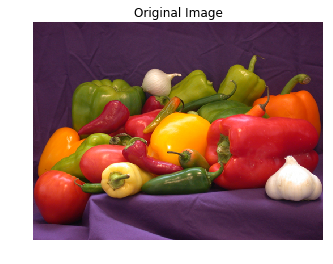

In [38]:
# load original image
original_img = cv2.imread('peppers.png')

# display original image
plt.axis('off')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

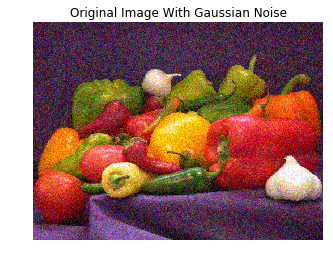

In [39]:
# load image with gaussian noise
gaussian_noise = cv2.imread('gaussian_noise_peppers.png')

# display image with gaussian noise
plt.axis('off')
plt.imshow(cv2.cvtColor(gaussian_noise, cv2.COLOR_BGR2RGB))
plt.title("Original Image With Gaussian Noise")
plt.show()

#### 1. Filter the noisy image using a 7×7 Gaussian ﬁlter with variance equals to 2.

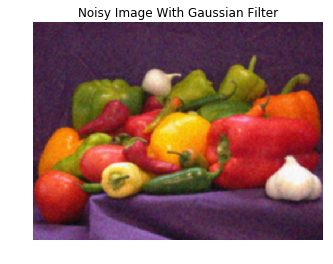

In [40]:
# apply gaussian filter
gaussian_filter = cv2.GaussianBlur(gaussian_noise, (7,7), np.sqrt(2))

# display result
plt.axis('off')
plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image With Gaussian Filter")
plt.show()

#### 2. Filter the noisy image using a box ﬁlter of the same size.

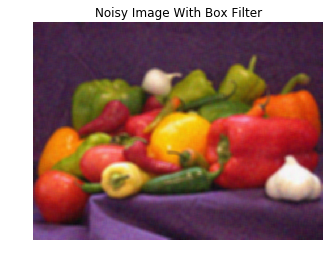

In [41]:
# apply a box filter
box_filter = cv2.filter2D(gaussian_noise, -1, np.ones((7,7), np.float32)/(7*7))

# display result
plt.axis('off')
plt.imshow(cv2.cvtColor(box_filter, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image With Box Filter")
plt.show()

#### 3. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives the superior result.

In [42]:
psnr_gaussian = skimg.compare_psnr(original_img, gaussian_filter)
psnr_box = skimg.compare_psnr(original_img, box_filter)
print('PSNR Of Gaussian Filter: ' + str(psnr_gaussian))
print('PSNR Of Box Filter: ' + str(psnr_box))

PSNR Of Gaussian Filter: 29.87927167099926
PSNR Of Box Filter: 28.278396476904042


##### Based on the PSNR values shown above, we can see that the Gaussian Filter performs better. This is expected as the initial noise was generated by gaussian blur, so it would only make sense to denoise it using the same filter.

#### You are also given an image corrupted by salt and pepper noise (Figure 1(c)). 

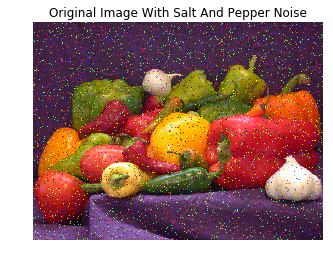

In [47]:
# load image with salt n' pepper noise
snp_noise = cv2.imread('saltandpepper_noise_peppers.png')

# display image with gaussian noise
plt.axis('off')
plt.imshow(cv2.cvtColor(snp_noise, cv2.COLOR_BGR2RGB))
plt.title("Original Image With Salt And Pepper Noise")
plt.show()

#### 4. Filter the noisy image using the same Gaussian ﬁlter as used in the previous question.

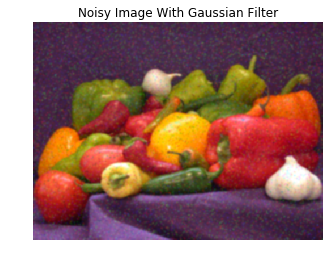

In [48]:
# apply gaussian filter
gaussian_filter = cv2.GaussianBlur(snp_noise, (7,7), np.sqrt(2))

# display result
plt.axis('off')
plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image With Gaussian Filter")
plt.show()

#### 5. Filter the noisy image using a median ﬁlter of the same size.

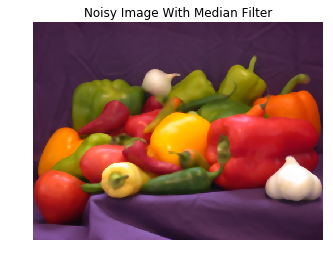

In [49]:
# apply median filter
median_filter = cv2.medianBlur(snp_noise, 7)

# display result
plt.axis('off')
plt.imshow(cv2.cvtColor(median_filter, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image With Median Filter")
plt.show()

##### 6. Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result.

In [50]:
psnr_gaussian = skimg.compare_psnr(original_img, gaussian_filter)
psnr_median = skimg.compare_psnr(original_img, median_filter)
print('PSNR Of Gaussian Filter: ' + str(psnr_gaussian))
print('PSNR Of Box Filter: ' + str(psnr_median))

PSNR Of Gaussian Filter: 28.1671611567447
PSNR Of Box Filter: 31.871009920638333


##### Based on the PSNR values shown above, we can see that the Median Filter performs better than the Gaussian Filter in this case. This is because salt and pepper noise is sparsely placed at random throughout the image. A median filter is optimal for reducing random noise which is the case here.